# <center> *USA - Covid 19 Report* <center/>
## <center> *Date: 08.02.2021* <center/>
## <center> *Created By: Tal Levi* <center/>

In [18]:
import pandas as pd
from analysis.classes import Country
from datetime import datetime, date
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [19]:
country = Country('usa')
df = country.data  # Pandas df object, that contains the data from the db.


### Part One - Data information

In [20]:
print(country)


Countries name: Usa
Countries id: 1
Continent: North America
Continent id: 1
Population: 331171664
First update: 2020-08-02
Last update: 2021-02-07
Data number of rows: 174
Data number of columns: 18
Columns: 
['Scrap_time', 'Update_time_GMT', 'Date', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [21]:
df.dtypes

Scrap_time                 object
Update_time_GMT            object
Date               datetime64[ns]
Country_id                  int64
Country                    object
Population                  int64
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical             int64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
dtype: object

In [22]:

print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


,null_count
Scrap_time,0
Update_time_GMT,59
Date,0
Country_id,0
Country,0
Population,0
TotalCases,0
NewCases,1
TotalDeaths,0
NewDeaths,1


In [23]:
print('The first five rows of the data:')
df.head(5)

The first five rows of the data:


,Scrap_time,Update_time_GMT,Date,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
0,2020-08-02 20:00:00,NaN,2020-08-02,1,USA,331171664,4778177,NaN,158039,NaN,2363229,NaN,2256909,18720,14428,477.000,59259593,178939
1,2020-08-08 20:00:00,NaN,2020-08-08,1,USA,331203424,5120955,342778.000,164577,6538.000,2620147,256918.000,2336231,18038,15462,497.000,64096129,193525
2,2020-08-12 20:00:00,NaN,2020-08-12,1,USA,331224597,5306851,185896.000,167761,3184.000,2756107,135960.000,2382983,17339,16022,506.000,66944595,202112
3,2020-08-16 20:00:00,NaN,2020-08-16,1,USA,331245770,5530028,223177.000,172608,4847.000,2904130,148023.000,2453290,17186,16695,521.000,70228171,212012
4,2020-08-17 20:00:00,NaN,2020-08-17,1,USA,331251064,5579686,49658.000,173258,650.000,2928179,24049.000,2478249,17237,16844,523.000,71149490,214790


In [24]:
print('The last five rows of the data.:')
df.tail(5)


The last five rows of the data.:


,Scrap_time,Update_time_GMT,Date,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
169,2021-02-04 12:00:13,00:00:00,2021-02-03,1,USA,332156223,27150457,123027.000,461930,4062.000,16906778,156131.000,9781749,23449,81740,1391.000,317086758,954631
170,2021-02-05 12:00:12,00:00:00,2021-02-04,1,USA,332161517,27273890,123433.000,466988,5058.000,17031629,124851.000,9775273,23159,82110,1406.000,318731459,959568
171,2021-02-06 12:00:13,00:00:00,2021-02-05,1,USA,332166810,27407324,133434.000,470705,3717.000,17146169,114540.000,9790450,22559,82511,1417.000,320639539,965297
172,2021-02-07 21:06:30,00:00:00,2021-02-06,1,USA,332172103,27519712,112388.000,473531,2826.000,17268517,122348.000,9777664,22406,82848,1426.000,322395403,970567
173,2021-02-08 12:00:13,00:00:00,2021-02-07,1,USA,332177397,27611403,91691.000,474933,1402.000,17354388,85871.000,9782082,21907,83122,1430.000,323804078,974793


### Part Two - Data Visualization
#### Cumulative data

In [25]:
country.linear_plot(save = True)

#### Three months measures

In [26]:
months_info = country.three_months_info()
months_info

,Year,Month,ActiveCasesAvg,RecoveredSum,DeathsSum,CasesSum,CriticalSum
0,2020,Nov,"4,233,092.600","2,125,846","38,027","4,487,702","650,288"
1,2020,Dec,"6,845,606.581","3,869,693","78,792","6,479,574","856,546"
2,2021,Jan,"9,250,192.100","4,352,391","99,563","6,416,214","841,355"


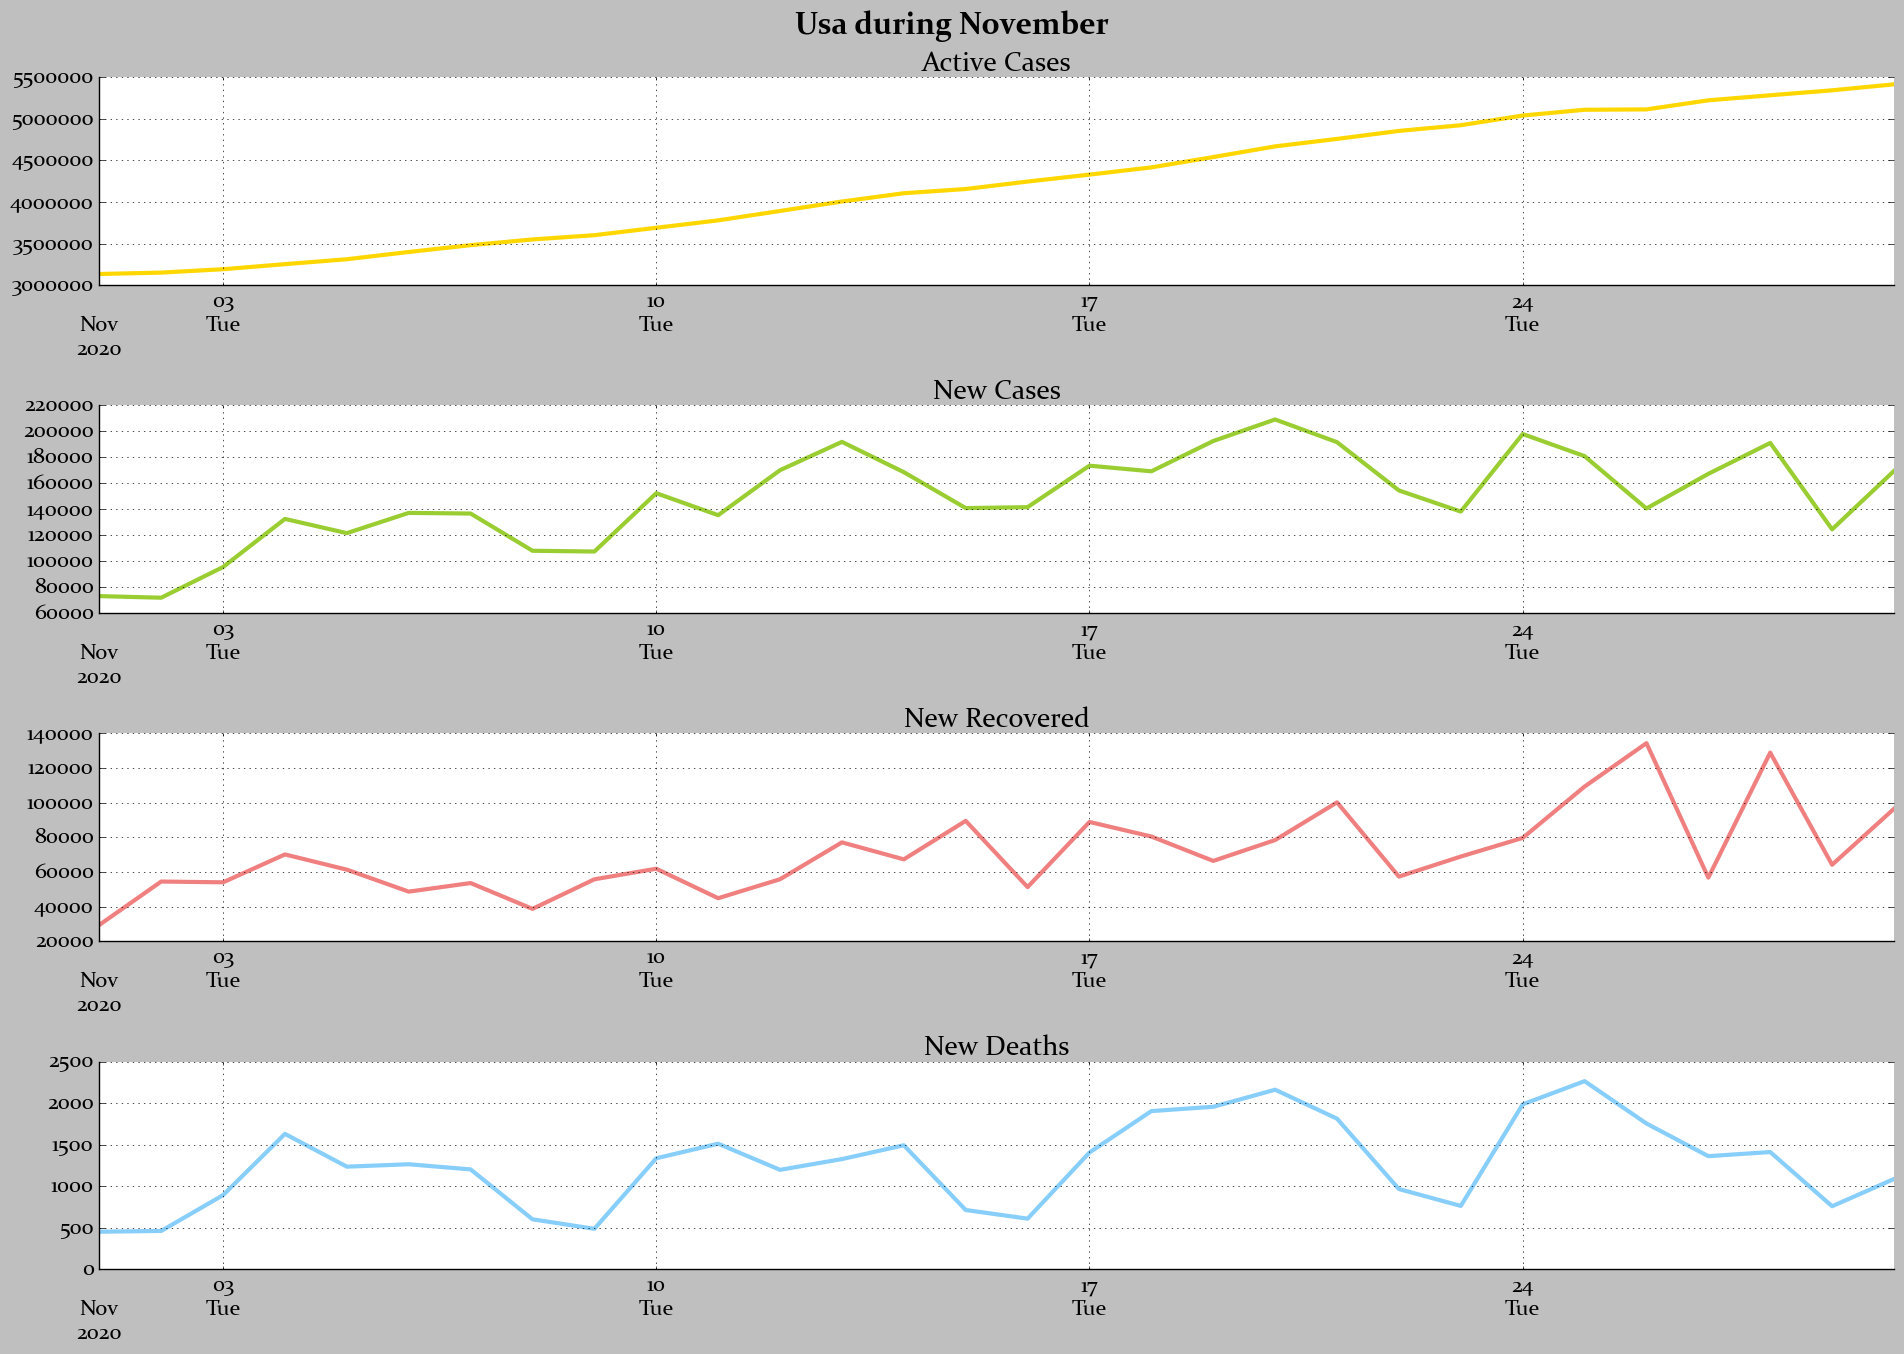

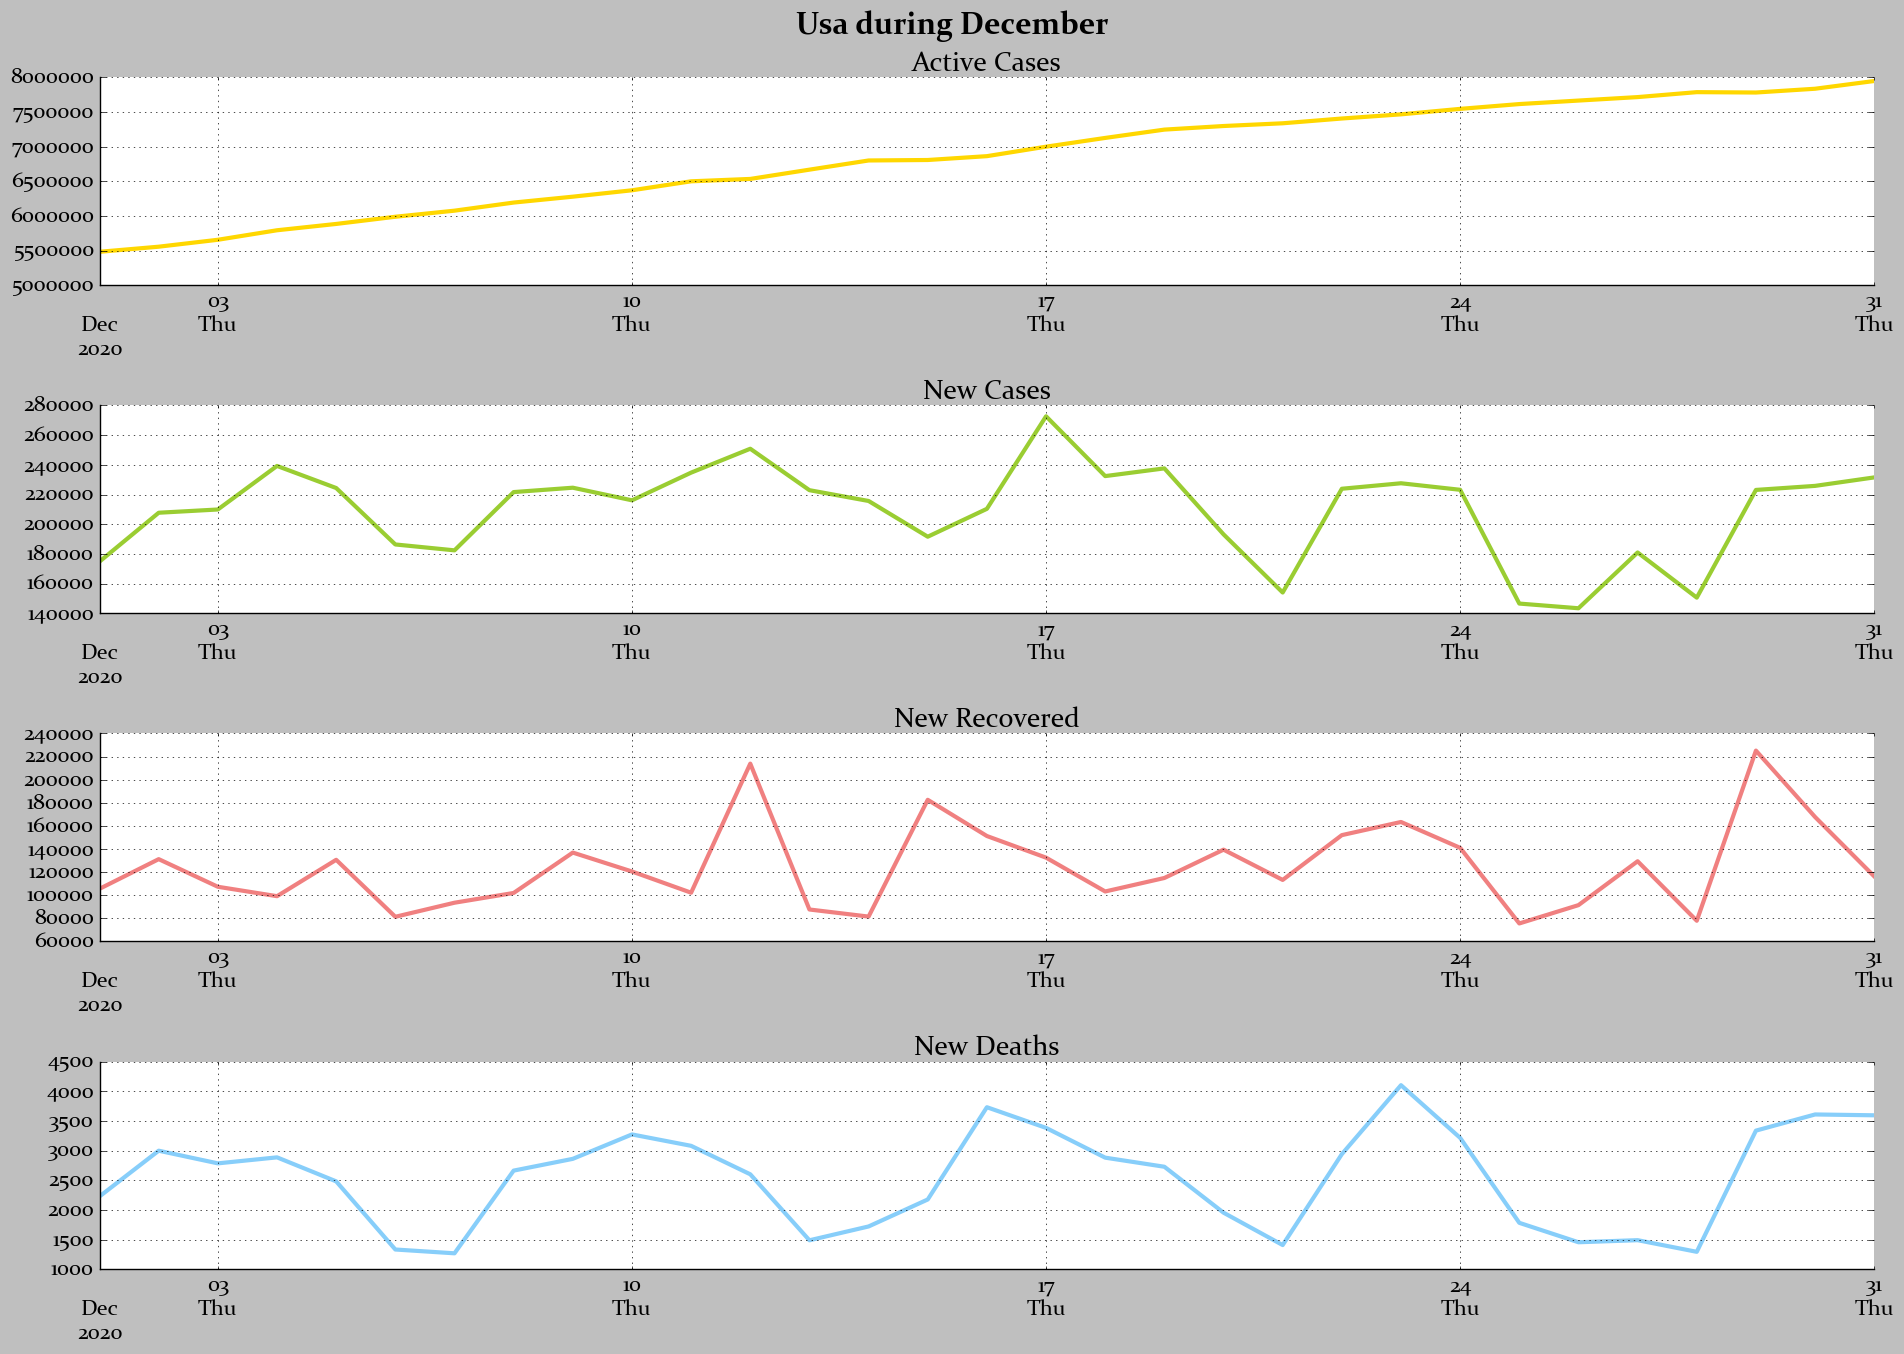

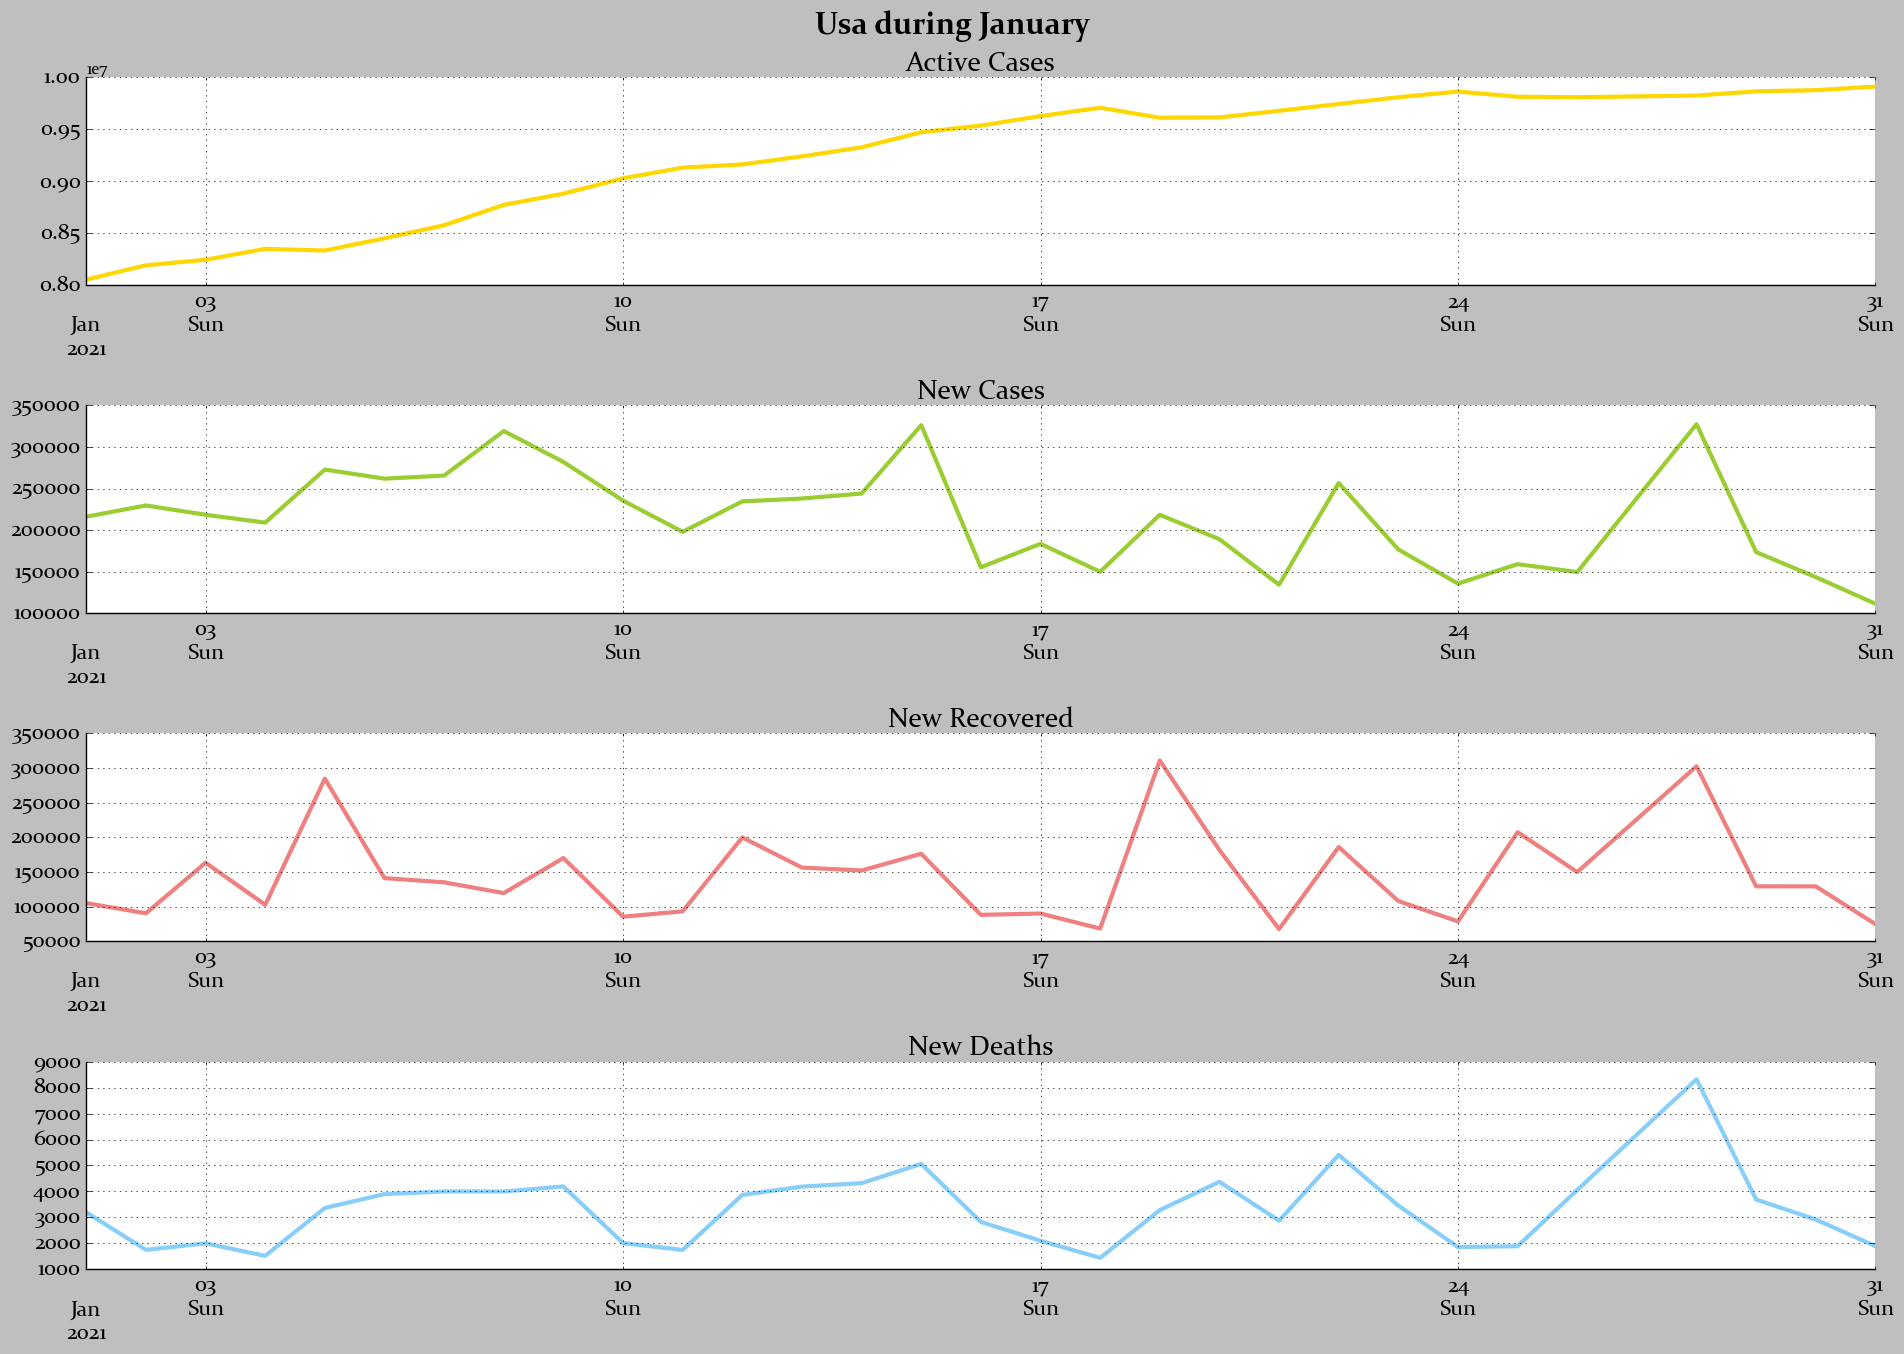

In [27]:
for month,year in zip(months_info['Month'].tolist(), months_info['Year'].tolist()):
    month_num = datetime.strptime(month[:3], "%b").month
    country.monthly_plot(['ActiveCases', 'NewCases', 'NewRecovered', 'NewDeaths'], month_num, year,save = True)

#### Daily increases in deaths, recoveries, active cases,new cases.

In [28]:
country.daily_increase3(save = True)


#### Closed cases ratio
$$TotalRecovered + TotalDeaths = TotalCases - ActiveCases$$

Answer:
    TotalRecovered TotalDeaths
173        97.336%      2.664%
Total time taken in closed_cases_pie function is: 0.00185 minutes.


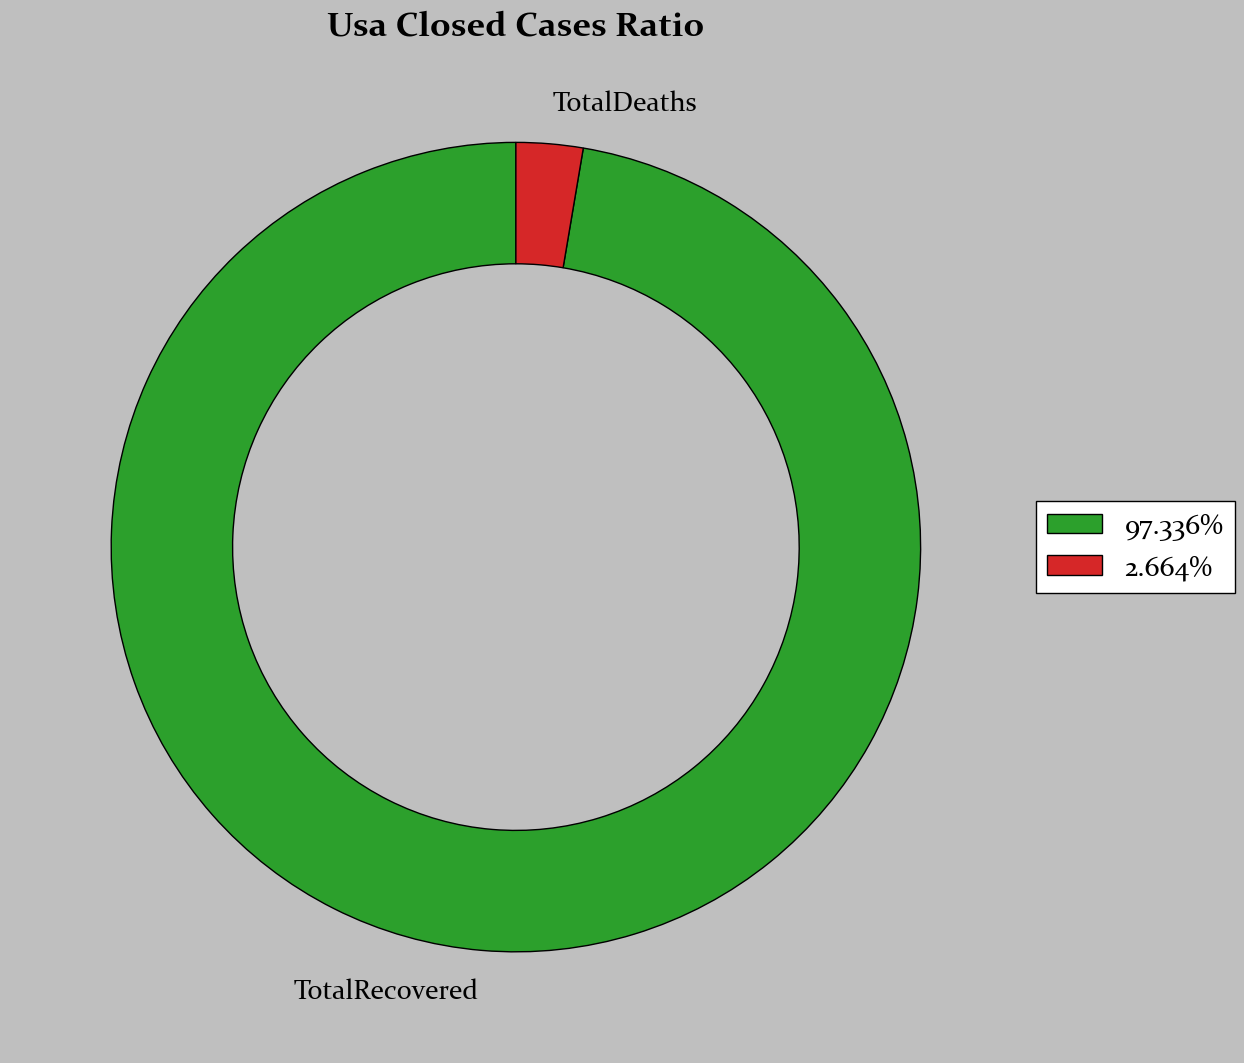

In [29]:
updated_totals = df[df['Date'].dt.date == country.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
print('Answer:')
print(res)
country.closed_cases_pie(save = True)

#### Measures Boxplot

In [30]:
country.boxplot(['ActiveCases'], save=True)

In [31]:
measures = ['NewCases','NewRecovered']
country.boxplot(measures, save=True)

In [32]:
country.boxplot(['NewDeaths'], save=True)

### Part Three - Basic Analysis

In [33]:
print("Q1.Find the date of the day with the highest New Cases.")
res_date = df[df['NewCases'] == df['NewCases'].max()]['Date'].dt.date
print('Answer:')
pd.DataFrame(res_date)

Q1.Find the date of the day with the highest New Cases.
Answer:


,Date
1,2020-08-08


In [34]:
print("Q2.Find the countries Case Fatality Ratio")
print('Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)')
country.case_fatality_ratio().astype('str') + '%'



Q2.Find the countries Case Fatality Ratio
Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)


'3.323%'